In [191]:
#Importing the modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline(True)
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [192]:
#Fetching the dataset
app_data = pd.read_csv('application_record.csv')
cre_data = pd.read_csv('credit_record.csv')


In [193]:
app_data.head(10)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   
6  5008811           F            N               Y             0   
7  5008812           F            N               Y             0   
8  5008813           F            N               Y             0   
9  5008814           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   
7          283500.0             Pensioner               Higher education   
8          283500.0             Pensioner               Higher education   
9          283500.0             Pensioner               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   
5  Single / not married  House / apartment      -19110          -3051   
6  Single / not married  House / apartment      -19110          -3051   
7             Separated  House / apartment      -22464         365243   
8             Separated  House / apartment      -22464         365243   
9             Separated  House / apartment      -22464         365243   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   
7           1                0           0           0             NaN   
8           1                0           0           0             NaN   
9           1                0           0           0             NaN   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0  
7              1.0  
8              1.0  
9              1.0

In [194]:
cre_data.head(10)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
5  5001712              -1      C
6  5001712              -2      C
7  5001712              -3      C
8  5001712              -4      C
9  5001712              -5      C

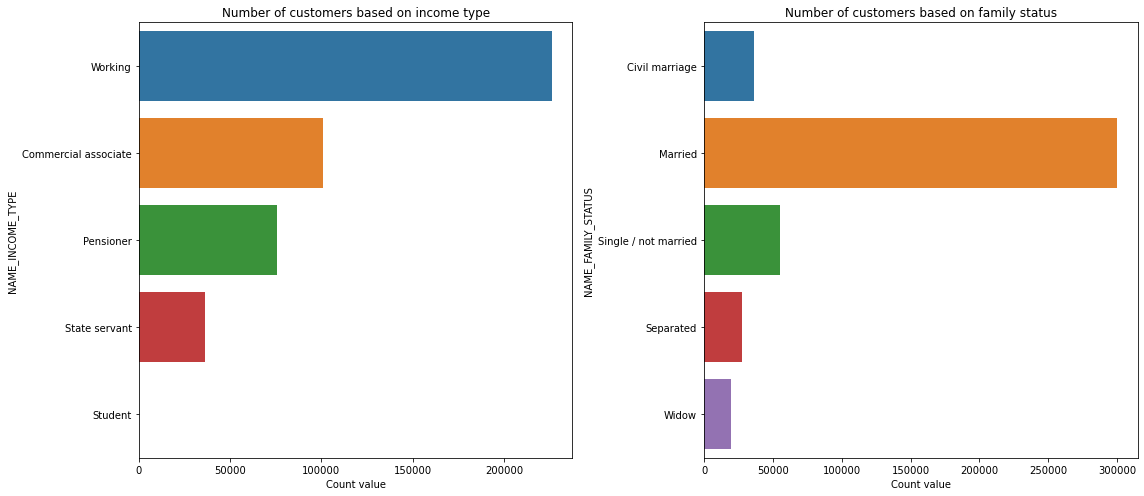

In [195]:
fig, axes = plt.subplots(1,2)

p1=sns.countplot(y=app_data.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
p1.set_title("Number of customers based on income type")
p1.set_xlabel("Count value")

p2=sns.countplot(y=app_data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
p2.set_title("Number of customers based on family status")
p2.set_xlabel("Count value")

fig.set_size_inches(16,7)

plt.tight_layout()


plt.show()

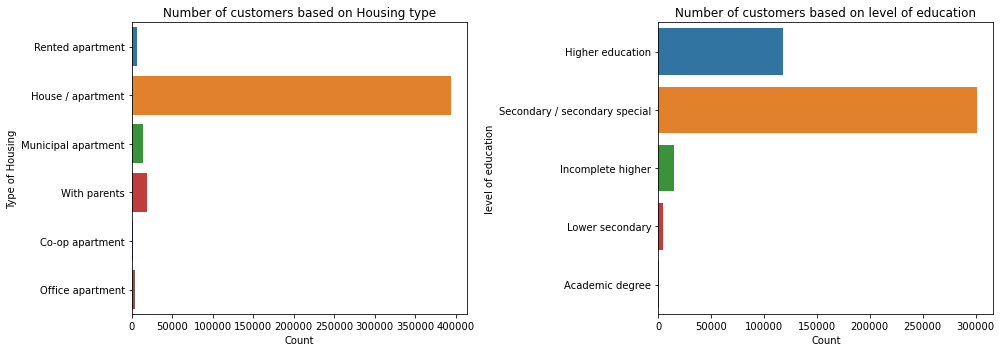

In [196]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=app_data.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Number of customers based on Housing type")
g1.set_xlabel("Count")
g1.set_ylabel("Type of Housing")

g2= sns.countplot(y=app_data.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Number of customers based on level of education")
g2.set_xlabel("Count")
g2.set_ylabel("level of education")

fig.set_size_inches(14,5)

plt.tight_layout()

In [197]:
defaults = cre_data[['ID','MONTHS_BALANCE']].groupby('ID').agg(min).reset_index()

display(defaults.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              45985 non-null  int64
 1   MONTHS_BALANCE  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


None

In [198]:
drop_index = app_data[app_data.duplicated(subset=['ID'], keep=False)].index

application_unique_data = app_data.drop(drop_index)

application_unique_data.shape

(438463, 18)

In [199]:
Data_Values = application_unique_data.merge(defaults, on='ID', how='left')

In [200]:
Data_Values.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  MONTHS_BALANCE  
0              2.0           -15.0  
1              2.0           -14.0  
2              2.0           -29.0  
3              1.0            -4.0  
4              1.0           -26.0

In [201]:
def risk(x):
    if x >= -3:
        return 'no'
    elif x < -3:
        return 'yes'
    else:
        return 'null'

Data_Values['RISK'] = Data_Values['MONTHS_BALANCE'].apply(lambda x: risk(x))

In [202]:
Data_Values.drop(Data_Values[Data_Values['RISK'] == 'null'].index, inplace=True)

In [203]:

lab_enc = LabelEncoder()

Data_Values['MALE'] = lab_enc.fit_transform(Data_Values['CODE_GENDER'])
Data_Values['CAR'] = lab_enc.fit_transform(Data_Values['FLAG_OWN_CAR'])
Data_Values['REALTY'] = lab_enc.fit_transform(Data_Values['FLAG_OWN_REALTY'])

Data_Values.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'], axis=1, inplace=True)

In [204]:
Data_Values['AGE'] = Data_Values['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))
Data_Values['YEARS_EMPLOYED'] = Data_Values['DAYS_EMPLOYED'].apply(lambda x: round(abs(x/365),2))

Data_Values.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)

In [205]:
Data_Values['INCOME'] = Data_Values['AMT_INCOME_TOTAL'].apply(lambda x: x/1000)

Data_Values.drop(['AMT_INCOME_TOTAL'], axis=1, inplace=True)

In [206]:
pd.set_option('display.max_columns', None)
Data_Values.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

  RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0  yes     1    1       1   33           12.44   427.5  
1  yes     1    1       1   33           12.44   427.5  
2  yes     1    1       1   59            3.11   112.5  
3  yes     0    0       1   52            8.36   270.0  
4  yes     0    0       1   52            8.36   270.0

In [207]:
Data_Values.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

  RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0  yes     1    1       1   33           12.44   427.5  
1  yes     1    1       1   33           12.44   427.5  
2  yes     1    1       1   59            3.11   112.5  
3  yes     0    0       1   52            8.36   270.0  
4  yes     0    0       1   52            8.36   270.0

In [208]:
px.box(data_frame=Data_Values, x='OCCUPATION_TYPE', y='AGE')

In [209]:
Data_Values.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

  RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0  yes     1    1       1   33           12.44   427.5  
1  yes     1    1       1   33           12.44   427.5  
2  yes     1    1       1   59            3.11   112.5  
3  yes     0    0       1   52            8.36   270.0  
4  yes     0    0       1   52            8.36   270.0

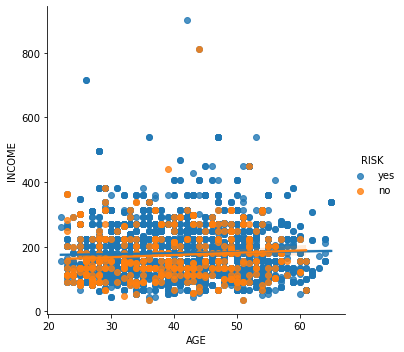

In [210]:
sns.lmplot(data=Data_Values[Data_Values['OCCUPATION_TYPE']=='Laborers'], x='AGE', y='INCOME', hue='RISK')

#Notice that the salary is increasing with age

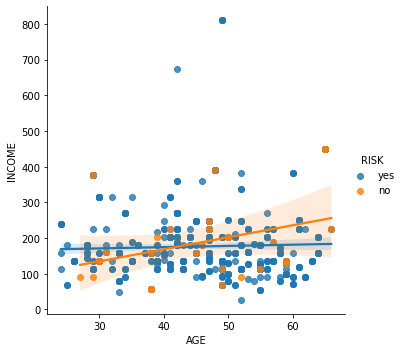

In [211]:
sns.lmplot(data=Data_Values[Data_Values['OCCUPATION_TYPE']=='Security staff'], x='AGE', y='INCOME', hue='RISK')


In [212]:
Data_Values.drop(Data_Values.query('OCCUPATION_TYPE=="Laborers" and AGE > 45 and INCOME > 200').index, inplace=True)
Data_Values.drop(Data_Values.query('OCCUPATION_TYPE=="Laborers" and INCOME > 400').index, inplace=True)

In [213]:
Data_Values.drop(Data_Values.query('OCCUPATION_TYPE=="Security staff" and AGE > 50 and INCOME > 200').index, inplace=True)
Data_Values.drop(Data_Values.query('OCCUPATION_TYPE=="Security staff" and INCOME > 400').index, inplace=True)

In [214]:
Data_Values['RISK'] = lab_enc.fit_transform(Data_Values['RISK'])

In [215]:
Data_Values.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

   RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0     1     1    1       1   33           12.44   427.5  
1     1     1    1       1   33           12.44   427.5  
2     1     1    1       1   59            3.11   112.5  
3     1     0    0       1   52            8.36   270.0  
4     1     0    0       1   52            8.36   270.0

In [216]:
display(Data_Values['NAME_INCOME_TYPE'].value_counts())

display(Data_Values['NAME_EDUCATION_TYPE'].value_counts())

display(Data_Values['NAME_FAMILY_STATUS'].value_counts())

display(Data_Values['NAME_HOUSING_TYPE'].value_counts())

Working                 18259
Commercial associate     8265
Pensioner                6152
State servant            2951
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    24152
Higher education                  9697
Incomplete higher                 1395
Lower secondary                    362
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 24471
Single / not married     4774
Civil marriage           2838
Separated                2037
Widow                    1518
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      31805
With parents            1761
Municipal apartment     1100
Rented apartment         557
Office apartment         254
Co-op apartment          161
Name: NAME_HOUSING_TYPE, dtype: int64

In [217]:
Data_Values['MARRIED'] = Data_Values['NAME_FAMILY_STATUS'].apply(lambda x: 1 if ((x == 'Married') or (x == 'Civil marriage')) else 0)

In [218]:
edu_degree = pd.get_dummies(Data_Values['NAME_EDUCATION_TYPE'], drop_first=True)
occupation_type = pd.get_dummies(Data_Values['NAME_INCOME_TYPE'], drop_first=True)

In [219]:
Data_Values = pd.concat([Data_Values, edu_degree, occupation_type], axis=1)

In [220]:
Data_Values.head(10)

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   
5  5008810             0  Commercial associate  Secondary / secondary special   
6  5008811             0  Commercial associate  Secondary / secondary special   
7  5008812             0             Pensioner               Higher education   
8  5008813             0             Pensioner               Higher education   
9  5008814             0             Pensioner               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   
5  Single / not married  House / apartment           1                0   
6  Single / not married  House / apartment           1                0   
7             Separated  House / apartment           1                0   
8             Separated  House / apartment           1                0   
9             Separated  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   
5           1           1     Sales staff              1.0           -26.0   
6           1           1     Sales staff              1.0           -38.0   
7           0           0             NaN              1.0           -20.0   
8           0           0             NaN              1.0           -16.0   
9           0           0             NaN              1.0           -17.0   

   RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  MARRIED  \
0     1     1    1       1   33           12.44   427.5        1   
1     1     1    1       1   33           12.44   427.5        1   
2     1     1    1       1   59            3.11   112.5        1   
3     1     0    0       1   52            8.36   270.0        0   
4     1     0    0       1   52            8.36   270.0        0   
5     1     0    0       1   52            8.36   270.0        0   
6     1     0    0       1   52            8.36   270.0        0   
7     1     0    0       1   62         1000.67   283.5        0   
8     1     0    0       1   62         1000.67   283.5        0   
9     1     0    0       1   62         1000.67   283.5        0   

   Higher education  Incomplete higher  Lower secondary  \
0                 1                  0                0   
1                 1                  0                0   
2                 0                  0                0   
3                 0                  0                0   
4                 0                  0                0   
5                 0                  0                0   
6                 0                  0                0   
7                 1                  0                0   
8                 1                  0                0   
9                 1                  0                0   

   Secondary / secondary special

In [221]:
occp_data = Data_Values.groupby(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']).size().rename("count").reset_index()

display(occp_data)

NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Commercial associate                Academic degree   
1    Commercial associate                Academic degree   
2    Commercial associate               Higher education   
3    Commercial associate               Higher education   
4    Commercial associate               Higher education   
..                    ...                            ...   
155               Working  Secondary / secondary special   
156               Working  Secondary / secondary special   
157               Working  Secondary / secondary special   
158               Working  Secondary / secondary special   
159               Working  Secondary / secondary special   

          OCCUPATION_TYPE  count  
0                Managers      2  
1             Sales staff     12  
2             Accountants    293  
3          Cleaning staff     11  
4           Cooking staff     14  
..                    ...    ...  
155         Realty agents     21  
156           Sales staff   1726  
157           Secretaries     43  
158        Security staff    300  
159  Waiters/barmen staff     81  

[160 rows x 4 columns]

In [222]:
occp_data_final = occp_data[occp_data.groupby(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'])['count'].transform(max) == occp_data['count']]

occp_data_final

NAME_INCOME_TYPE            NAME_EDUCATION_TYPE OCCUPATION_TYPE  \
1    Commercial associate                Academic degree     Sales staff   
12   Commercial associate               Higher education        Managers   
25   Commercial associate              Incomplete higher        Managers   
33   Commercial associate                Lower secondary        Laborers   
43   Commercial associate  Secondary / secondary special        Laborers   
53              Pensioner               Higher education     Accountants   
54              Pensioner               Higher education      Core staff   
55              Pensioner               Higher education        Laborers   
56              Pensioner               Higher education        Managers   
57              Pensioner               Higher education  Medicine staff   
58              Pensioner  Secondary / secondary special      Core staff   
65          State servant               Higher education      Core staff   
75          State servant              Incomplete higher      Core staff   
82          State servant                Lower secondary  Medicine staff   
86          State servant  Secondary / secondary special      Core staff   
99                Student               Higher education      Core staff   
100               Student  Secondary / secondary special        Laborers   
111               Working               Higher education        Managers   
124               Working              Incomplete higher        Laborers   
137               Working                Lower secondary        Laborers   
150               Working  Secondary / secondary special        Laborers   

     count  
1       12  
12     696  
25      74  
33      16  
43    1016  
53       1  
54       1  
55       1  
56       1  
57       1  
58       4  
65     516  
75      34  
82      12  
86     350  
99       8  
100      2  
111    810  
124    153  
137     54  
150   3282

In [223]:
def fill_occp(values):
    profession = values[0]
    degree = values[1]
    occupation = values[2]
    if pd.isnull(occupation):
        for index,row in occp_data_final.iterrows():
            if ((row['NAME_INCOME_TYPE'] == profession) and (row['NAME_EDUCATION_TYPE'] == degree)):
                return row['OCCUPATION_TYPE']
    else:
        return occupation
            
            
Data_Values['OCCUPATION'] = Data_Values[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']].apply(fill_occp,axis=1)

In [224]:
occupation_type = pd.get_dummies(Data_Values['OCCUPATION'], drop_first=True)

occupation_type.head()

Cleaning staff  Cooking staff  Core staff  Drivers  HR staff  \
0               0              0           0        0         0   
1               0              0           0        0         0   
2               0              0           0        0         0   
3               0              0           0        0         0   
4               0              0           0        0         0   

   High skill tech staff  IT staff  Laborers  Low-skill Laborers  Managers  \
0                      0         0         0                   0         1   
1                      0         0         0                   0         1   
2                      0         0         0                   0         0   
3                      0         0         0                   0         0   
4                      0         0         0                   0         0   

   Medicine staff  Private service staff  Realty agents  Sales staff  \
0               0                      0              0            0   
1               0                      0              0            0   
2               0                      0              0            0   
3               0                      0              0            1   
4               0                      0              0            1   

   Secretaries  Security staff  Waiters/barmen staff  
0            0               0                     0  
1            0               0                     0  
2            0               1                     0  
3            0               0                     0  
4            0               0                     0

In [225]:
px.box(data_frame=Data_Values, x='OCCUPATION_TYPE', y='INCOME')

In [226]:
occupation_type['CLASS 3 WORKERS'] = occupation_type[['Cleaning staff','Cooking staff','Drivers','Laborers','Low-skill Laborers','Security staff','Waiters/barmen staff']].sum(axis=1)
occupation_type['CLASS 2 WORKERS'] = occupation_type[['HR staff','Sales staff','Secretaries','Medicine staff','Private service staff']].sum(axis=1)
occupation_type['CLASS 1 WORKERS'] = occupation_type[['Managers','Core staff','High skill tech staff','IT staff','Realty agents']].sum(axis=1)


occupation_type.drop(['Cleaning staff','Cooking staff','Drivers','Laborers','Low-skill Laborers','Security staff','Waiters/barmen staff','HR staff','Sales staff','Secretaries','Medicine staff','Private service staff','Managers','High skill tech staff','IT staff','Realty agents','Core staff'], axis=1,inplace=True)


In [227]:
occupation_type.head()

CLASS 3 WORKERS  CLASS 2 WORKERS  CLASS 1 WORKERS
0                0                0                1
1                0                0                1
2                1                0                0
3                0                1                0
4                0                1                0

In [228]:
Data_Values = pd.concat([Data_Values, occupation_type], axis=1)

In [229]:
Data_Values['NAME_HOUSING_TYPE'].value_counts()

House / apartment      31805
With parents            1761
Municipal apartment     1100
Rented apartment         557
Office apartment         254
Co-op apartment          161
Name: NAME_HOUSING_TYPE, dtype: int64

In [230]:
Data_Values['OWN_HOUSE'] = Data_Values['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'House / apartment' else 0)

In [231]:
Data_Values.drop(['ID','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','MONTHS_BALANCE','OCCUPATION'], axis=1, inplace=True)

Data_Values.rename(columns={'CNT_CHILDREN':'CHILD','FLAG_MOBIL':'MOBIL','FLAG_PHONE':'PHONE','FLAG_EMAIL':'EMAIL','CNT_FAM_MEMBERS':'FAMILY_MEMBERS'}, inplace=True)
Data_Values.head()

CHILD  MOBIL  FLAG_WORK_PHONE  PHONE  EMAIL  FAMILY_MEMBERS  RISK  MALE  \
0      0      1                1      0      0             2.0     1     1   
1      0      1                1      0      0             2.0     1     1   
2      0      1                0      0      0             2.0     1     1   
3      0      1                0      1      1             1.0     1     0   
4      0      1                0      1      1             1.0     1     0   

   CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  MARRIED  Higher education  \
0    1       1   33           12.44   427.5        1                 1   
1    1       1   33           12.44   427.5        1                 1   
2    1       1   59            3.11   112.5        1                 0   
3    0       1   52            8.36   270.0        0                 0   
4    0       1   52            8.36   270.0        0                 0   

   Incomplete higher  Lower secondary  Secondary / secondary special  \
0                  0                0                              0   
1                  0                0                              0   
2                  0                0                              1   
3                  0                0                              1   
4                  0                0                              1   

   Pensioner  State servant  Student  Working  CLASS 3 WORKERS  \
0          0              0        0        1                0   
1          0              0        0        1                0   
2          0              0        0        1                1   
3          0              0        0        0                0   
4          0              0        0        0                0   

   CLASS 2 WORKERS  CLASS 1 WORKERS  OWN_HOUSE  
0                0                1          0  
1                0                1          0  
2                0                0          1  
3                1                0          1  
4                1                0          1

In [232]:
X = Data_Values.drop('RISK', axis=1)
y = Data_Values['RISK']


X_bal,y_bal = SMOTE().fit_resample(X,y)

X_bal = pd.DataFrame(X_bal, columns=X.columns)

In [233]:
from sklearn.model_selection import train_test_split

TrainX, TestX, TrainY, TestY = train_test_split(X_bal,y_bal,stratify = y_bal,test_size=0.3, random_state=123)

In [234]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

Logistic_Reg = LogisticRegression()

Logistic_Reg.fit(TrainX, TrainY)

Pred_Y = Logistic_Reg.predict(TestX)


Training Accuracy of the model is
0.7825380189506556

Testing Accuracy of the model is
0.776862803812946

AUC
0.7768650574090901
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     10019
           1       0.75      0.82      0.79     10018

    accuracy                           0.78     20037
   macro avg       0.78      0.78      0.78     20037
weighted avg       0.78      0.78      0.78     20037

Confusion Matrix


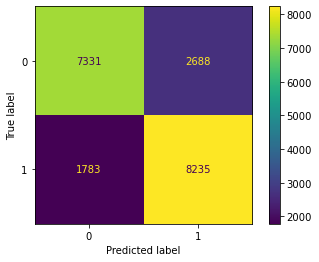

In [235]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("Training Accuracy of the model is")
print(Logistic_Reg.score(TrainX, TrainY))
print("\nTesting Accuracy of the model is")
print(Logistic_Reg.score(TestX, TestY))

print("\nAUC")
print(roc_auc_score(TestY, Pred_Y))

print(classification_report(TestY, Pred_Y))


print('Confusion Matrix')

plot_confusion_matrix(Logistic_Reg, TestX, TestY)  
plt.show()



In [236]:
from sklearn.model_selection import RandomizedSearchCV
C = np.logspace(-3,1,5)
max_iter = [50,80,100,120,150,180,200]
penalty = ['l2']
tol = np.logspace(-8,-3,6)

param = {'C':C,'max_iter':max_iter,'tol':tol,'penalty':penalty}

Logistic_Reg_cv = RandomizedSearchCV(estimator=Logistic_Reg, 
                               param_distributions=param, 
                               n_iter=50, 
                               cv=10, 
                               scoring='accuracy', 
                               verbose=3, n_jobs=-1)

Logistic_Reg_cv.fit(TrainX, TrainY)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'max_iter': [50, 80, 100, 120, 150, 180,
                                                     200],
                                        'penalty': ['l2'],
                                        'tol': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03])},
                   scoring='accuracy', verbose=3)

In [237]:
Logistic_Reg_best = Logistic_Reg_cv.best_estimator_

y_pred = Logistic_Reg_best.predict(TestX)
Logistic_Reg_cv.best_params_

{'tol': 0.001, 'penalty': 'l2', 'max_iter': 200, 'C': 0.01}

Training Accuracy of the model is
0.7804418967766774

Testing Accuracy of the model is
0.775714927384339

AUC
0.7768650574090901
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     10019
           1       0.75      0.82      0.79     10018

    accuracy                           0.78     20037
   macro avg       0.78      0.78      0.78     20037
weighted avg       0.78      0.78      0.78     20037



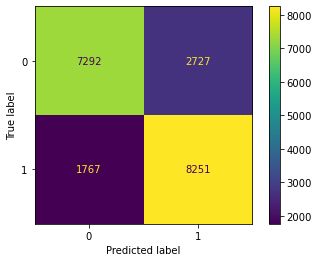

In [238]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("Training Accuracy of the model is")
print(Logistic_Reg_best.score(TrainX, TrainY))
print("\nTesting Accuracy of the model is")
print(Logistic_Reg_best.score(TestX, TestY))

print("\nAUC")
print(roc_auc_score(TestY, Pred_Y ))


print(classification_report(TestY, Pred_Y))

plot_confusion_matrix(Logistic_Reg_cv, TestX, TestY)  
plt.show()

In [239]:
from sklearn.svm import LinearSVC,SVC

S_V_M = LinearSVC()

S_V_M.fit(TrainX, TrainY)

y_pred = S_V_M.predict(TestX)

In [240]:
C = np.logspace(-4,1,6)
tol = np.logspace(-6,-2,5)


param = {'C':C, 'tol':tol}
S_V_M_cv = RandomizedSearchCV(estimator=S_V_M, 
                               param_distributions=param, 
                               n_iter=50, 
                               cv=10, 
                               scoring='accuracy', 
                               verbose=3, n_jobs=-1)

S_V_M_cv.fit(TrainX, TrainY)

y_pred = S_V_M_cv.predict(TestX)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_

In [241]:
S_V_M_cv.best_params_

{'tol': 1e-06, 'C': 0.01}

Training Accuracy of the model is
0.7941094689110859

Testing Accuracy of the model is
0.7937315965463891

AUC
0.7768650574090901
Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     10019
           1       0.75      0.82      0.79     10018

    accuracy                           0.78     20037
   macro avg       0.78      0.78      0.78     20037
weighted avg       0.78      0.78      0.78     20037

Confusion_matrix


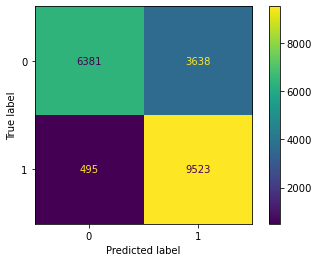

In [242]:
print("Training Accuracy of the model is")
print(S_V_M_cv.score(TrainX, TrainY))
print("\nTesting Accuracy of the model is")
print(S_V_M_cv.score(TestX, TestY))

print("\nAUC")
print(roc_auc_score(TestY, Pred_Y))

print('Report')
print(classification_report(TestY, Pred_Y))

print('Confusion_matrix')

plot_confusion_matrix(S_V_M_cv, TestX, TestY)  
plt.show()

[CV 2/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.780 total time=   0.6s
[CV 1/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.780 total time=   0.7s
[CV 10/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.782 total time=   0.7s
[CV 7/10] END C=1.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.789 total time=   0.6s
[CV 5/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.741 total time=   0.2s
[CV 1/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.778 total time=   0.6s
[CV 9/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.783 total time=   0.6s
[CV 7/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.790 total time=   0.6s
[CV 6/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.778 total time=   0.7s
[CV 4/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-08;, score=0.781 total time=   0.6s
[CV 1/10] END C=0.01, max_iter=150, penalty=l2, tol=1e-06;, score=0.781 total time=   0.6s
[CV 9

[CV 6/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.778 total time=   0.6s
[CV 10/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.777 total time=   0.6s
[CV 8/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.780 total time=   0.7s
[CV 4/10] END C=1.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.781 total time=   0.5s
[CV 1/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.720 total time=   0.2s
[CV 7/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.729 total time=   0.2s
[CV 3/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.781 total time=   0.5s
[CV 10/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.781 total time=   0.6s
[CV 8/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.780 total time=   0.6s
[CV 5/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.783 total time=   0.7s
[CV 3/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-08;, score=0.782 total time=   0.7s
[CV 

[CV 7/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.788 total time=   0.6s
[CV 9/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.785 total time=   0.6s
[CV 7/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.792 total time=   0.7s
[CV 3/10] END C=1.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.780 total time=   0.6s
[CV 2/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.765 total time=   0.2s
[CV 8/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.719 total time=   0.2s
[CV 5/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.783 total time=   0.5s
[CV 3/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.781 total time=   0.6s
[CV 10/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.781 total time=   0.6s
[CV 8/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.778 total time=   0.8s
[CV 5/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-08;, score=0.783 total time=   0.7s
[CV 3/

[CV 3/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.778 total time=   0.6s
[CV 3/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.782 total time=   0.6s
[CV 9/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.787 total time=   0.6s
[CV 5/10] END C=1.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.781 total time=   0.6s
[CV 3/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.749 total time=   0.2s
[CV 9/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.724 total time=   0.2s
[CV 6/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.777 total time=   0.6s
[CV 4/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.783 total time=   0.5s
[CV 1/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.775 total time=   0.7s
[CV 9/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.785 total time=   0.7s
[CV 7/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-08;, score=0.786 total time=   0.7s
[CV 5/10

[CV 1/10] END C=10.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.778 total time=   0.6s
[CV 5/10] END C=0.1, max_iter=180, penalty=l2, tol=1e-07;, score=0.783 total time=   0.7s
[CV 1/10] END C=0.1, max_iter=50, penalty=l2, tol=0.001;, score=0.720 total time=   0.2s
[CV 5/10] END C=0.1, max_iter=50, penalty=l2, tol=0.001;, score=0.773 total time=   0.2s
[CV 9/10] END C=0.1, max_iter=50, penalty=l2, tol=0.001;, score=0.738 total time=   0.2s
[CV 6/10] END C=1.0, max_iter=150, penalty=l2, tol=1e-05;, score=0.778 total time=   0.5s
[CV 4/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.770 total time=   0.2s
[CV 10/10] END C=10.0, max_iter=50, penalty=l2, tol=1e-08;, score=0.758 total time=   0.2s
[CV 7/10] END C=0.1, max_iter=150, penalty=l2, tol=0.0001;, score=0.790 total time=   0.6s
[CV 5/10] END C=0.1, max_iter=150, penalty=l2, tol=1e-05;, score=0.783 total time=   0.6s
[CV 3/10] END C=1.0, max_iter=180, penalty=l2, tol=1e-06;, score=0.782 total time=   0.7s
[CV 1/10] 

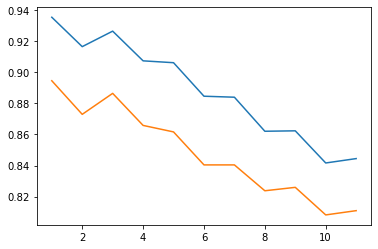

In [243]:
#KNN Model
neighbours = np.arange(1,12)

train_acc = np.empty(len(neighbours))
test_acc = np.empty(len(neighbours))

for i,n in enumerate(neighbours):
    K_N_N = KNeighborsClassifier(n_neighbors=n)
    
    K_N_N.fit(TrainX, TrainY)
    train_acc[i] = K_N_N.score(TrainX, TrainY)
    test_acc[i] = K_N_N.score(TestX, TestY)
    

plt.plot(neighbours, train_acc, label='tain')
plt.plot(neighbours, test_acc, label='test')

In [244]:
K_N_N_1 = KNeighborsClassifier(n_neighbors=1)

K_N_N_1.fit(TrainX, TrainY)
y_pred = K_N_N_1.predict(TestX)

Training Accuracy of the model is
0.9355763266528351


Training Accuracy of the model is
0.8946449069221939
Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     10019
           1       0.75      0.82      0.79     10018

    accuracy                           0.78     20037
   macro avg       0.78      0.78      0.78     20037
weighted avg       0.78      0.78      0.78     20037


AUC
0.8946441419916652
Confusion_matrix


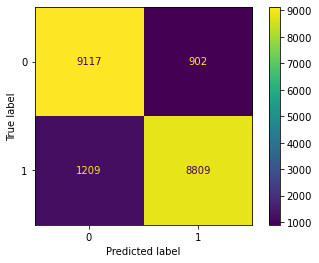

In [252]:
print('Training Accuracy of the model is')
print(K_N_N_1.score(TrainX, TrainY))
print()
print('\nTraining Accuracy of the model is')
print(K_N_N_1.score(TestX, TestY))


print('Report')
print(classification_report(TestY, Pred_Y))

print("\nAUC")
print(roc_auc_score(TestY, y_pred))

print('Confusion_matrix')
plot_confusion_matrix(K_N_N_1,TestX, TestY)  
plt.show()

In [247]:
#XGB Model
from sklearn.model_selection import RandomizedSearchCV
params_xgb = {
                'max_depth' : [3,4,5,6],
                'min_samples_leaf' : [0.02,0.04,0.05,0.06],
                'max_features' : [0.2,0.4,0.6,0.8,0.9],
                'n_estimators' : [150,200,250],
                'subsample' : np.arange(0.05,1.05,0.1),
                'learning_rate' : np.arange(0.05,1.05,0.1),
                'colsample_bytree' : np.arange(0.05,1.05,0.1),
                'gamma' : [0.05,0.1,0.5,1]
                           
            }

gbm = xgb.XGBClassifier()

xgb_crosv =     RandomizedSearchCV(estimator=gbm,
                                n_iter=150,
                                param_distributions=params_xgb, 
                                cv=3, scoring='accuracy',
                                n_jobs=-1, verbose=2,
                               random_state=123)

In [248]:
xgb_crosv.fit(TrainX, TrainY)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[18:47:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bytree': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]),
         

In [249]:
xgb_crosv.best_params_

{'subsample': 0.7500000000000002,
 'n_estimators': 200,
 'min_samples_leaf': 0.04,
 'max_features': 0.9,
 'max_depth': 6,
 'learning_rate': 0.45000000000000007,
 'gamma': 0.1,
 'colsample_bytree': 0.8500000000000002}

Accuracy Train
0.9390413449404317



Accuracy Test
0.9219444028547188
Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10019
           1       0.91      0.93      0.92     10018

    accuracy                           0.92     20037
   macro avg       0.92      0.92      0.92     20037
weighted avg       0.92      0.92      0.92     20037


AUC
0.9219448260921538
Confusion_matrix


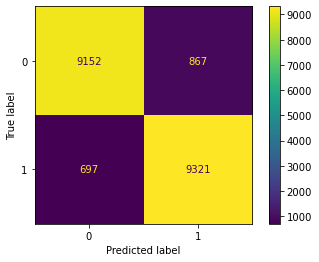

In [253]:
xgb_predic = xgb_crosv.predict(TestX)

print('Accuracy Train')
print(xgb_crosv.score(TrainX, TrainY))
print("\n")
print('\nAccuracy Test')
print(xgb_crosv.score(TestX, TestY))

print('Report')
print(classification_report(TestY, xgb_predic))

print("\nAUC")
print(roc_auc_score(TestY, xgb_predic))

print('Confusion_matrix')
plot_confusion_matrix(xgb_crosv, TestX, TestY)  
plt.show()
